Q2. Write a hand coded program to perform a geometric transformation with an affine 
transformation matrix. T. Implement bilinear interpolation for obtaining the intensity values 
wherever needed. Apply it to the cameraman.jpg image to do the following transformations. 
Compare the result with inbuilt function.  
• Translate to the right by 25 pixels and down 30 pixels.  
• Expand by a factor of 2.0 horizontally and shrink by a factor of two vertically. 

In [1]:
# Importing all the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Reading the Cameraman image and also converting it in grayscale
img = cv2.imread("cameraman.jpg", cv2.IMREAD_GRAYSCALE)

# image to numpy array
img = np.asarray(img)

### **BILINEAR INTERPOLATION**

In [3]:
def bilinear_interpolation(image, dimension):
    '''Bilinear interpolation method to convert small image to original image
    Parameters:
    img (numpy.ndarray): Small image
    dimension (tuple): resizing image dimension

    Returns:
    numpy.ndarray: Resized image
    '''
    height = image.shape[0]
    width = image.shape[1]

    scale_x = (width)/(dimension[1])
    scale_y = (height)/(dimension[0])

    new_image = np.zeros((dimension[0], dimension[1]), dtype = np.uint8)

    
    for i in range(dimension[0]):
        for j in range(dimension[1]):
            x = (j+0.5) * (scale_x) - 0.5  # mapping new image pixel to original coordinates 
            y = (i+0.5) * (scale_y) - 0.5

            x_int = int(x)
            y_int = int(y)

            # Prevent crossing
            x_int = min(x_int, width-2)
            y_int = min(y_int, height-2)

            x_diff = x - x_int
            y_diff = y - y_int

            a = image[y_int, x_int]
            b = image[y_int, x_int+1]
            c = image[y_int+1, x_int]
            d = image[y_int+1, x_int+1]

            pixel = a*(1-x_diff)*(1-y_diff) + b*(x_diff) * \
                (1-y_diff) + c*(1-x_diff) * (y_diff) + d*x_diff*y_diff

            new_image[i, j] = pixel.astype(np.uint8)

    return new_image
new_dimensions=(200,200)
resized_image = bilinear_interpolation(img,new_dimensions) 


### **IDENTITY TRANSOFORMATION USING IDENTITY AFFINE MATRIX** 

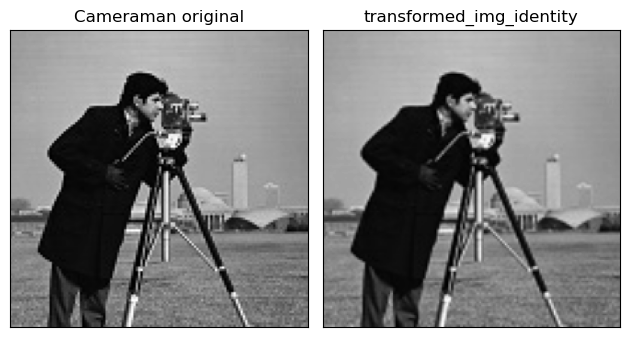

In [4]:
# defining a identity function 
def identity_transformation(matrix, img):
    x_max = img.shape[1]
    y_max = img.shape[0]

    # Creating and empty image which has same size as original to store new transoformed image, we can also
    # increase the matrix size but we are just doing identity transformation there is no need to increase the size 
    new_img_map = np.zeros((x_max, y_max), dtype=np.uint8)

    # For loop to access each pixel of the image so that we can apply the formula for each pixel
    # X' = AX where A is affine matrix and x are original pixel coordinates 
    for y_counter in range(0, y_max):
        for x_counter in range(0, x_max):
            # Define the current pixel with homogeneous coordinates
            curr_pixel = [x_counter, y_counter, 1]
            # Apply the transformation matrix
            curr_pixel = np.dot(matrix, curr_pixel)

            # Check if the transformed pixel is within bounds
            if 0 <= curr_pixel[0] < x_max and 0 <= curr_pixel[1] < y_max:
                new_img_map[y_counter, x_counter] = img[int(curr_pixel[1]), int(curr_pixel[0])]

    return new_img_map

# Identity affine matrix (no transformation)
affine_matrix = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

# Apply identity transformation
transformed_img_identity = identity_transformation(affine_matrix, resized_image)

plt.figure()
plt.subplot(121)
plt.title("Cameraman original")
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.title("transformed_img_identity")
plt.imshow(transformed_img_identity, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

# Display the result using OpenCV
# cv2.imshow("Transformed Image", transformed_img_identity)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


### **ROTATION USING ROTATION AFFINE MATRIX** 

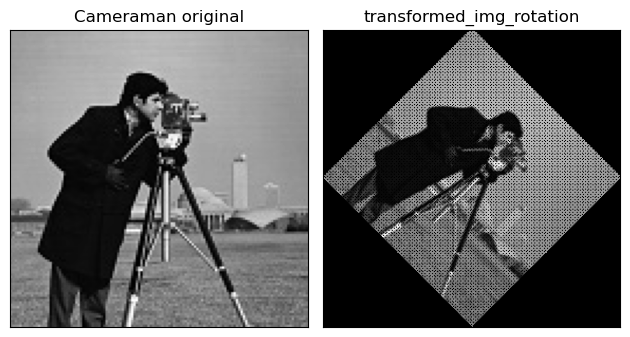

In [5]:
def rotation(matrix, img):
    x_max, y_max = img.shape[1], img.shape[0]

    # Calculate the new size needed to fit the rotated image
    new_x_max = int(np.abs(x_max * matrix[0, 0]) + np.abs(y_max * matrix[1, 0]))
    new_y_max = int(np.abs(x_max * matrix[0, 1]) + np.abs(y_max * matrix[1, 1]))

    # Create an empty image for the transformed result
    new_img_map = np.zeros((new_y_max, new_x_max), dtype=np.uint8)

    # Find the center of the original and new image
    x_center = x_max // 2
    y_center = y_max // 2
    new_x_center = new_x_max // 2
    new_y_center = new_y_max // 2

    # Loop over each pixel in the original image
    for y_counter in range(0, y_max):
        for x_counter in range(0, x_max):
            # Define the current pixel with homogeneous coordinates
            curr_pixel = np.array([x_counter - x_center, y_counter - y_center, 1])
            # Apply the transformation matrix
            curr_pixel_transformed = np.dot(matrix, curr_pixel)

            # Translate back to the center of the new image
            new_x = int(curr_pixel_transformed[0] + new_x_center)
            new_y = int(curr_pixel_transformed[1] + new_y_center)

            # Check if the transformed pixel is within bounds
            if 0 <= new_x < new_x_max and 0 <= new_y < new_y_max:
                new_img_map[new_y, new_x] = img[y_counter, x_counter]

    return new_img_map

def rotation_matrix(theta):
    theta = np.deg2rad(theta)
    affine_matrix = np.array([
                            [np.cos(theta), -np.sin(theta),    0    ],
                            [np.sin(theta),  np.cos(theta),    0    ],
                            [      0      ,      0        ,    1    ]
    ])
    return affine_matrix

# Apply rotation transformation
rotation_angle = int(input("Give the required angle to rotate: "))
affine_matrix = rotation_matrix(rotation_angle)

transformed_img_rotation = rotation(affine_matrix, resized_image)

plt.figure()
plt.subplot(121)
plt.title("Cameraman original")
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.title("transformed_img_rotation")
plt.imshow(transformed_img_rotation, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

# Display the result using OpenCV
# cv2.imshow("Transformed Image", transformed_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


### **SCALING USING AFFINE MATRIX** 

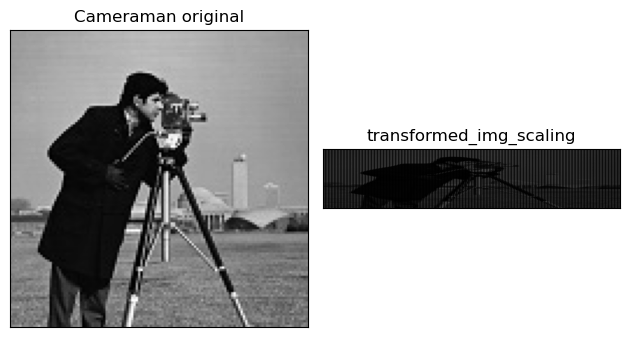

In [6]:
def transform_image(matrix, img):
    x_max, y_max = img.shape[1], img.shape[0]

    # Calculate the new size needed to fit the transformed image
    new_x_max = int(np.abs(x_max * matrix[0, 0]) + np.abs(y_max * matrix[0, 1]))
    new_y_max = int(np.abs(x_max * matrix[1, 0]) + np.abs(y_max * matrix[1, 1]))

    # Create an empty image for the transformed result
    new_img_map = np.zeros((new_y_max, new_x_max), dtype=np.uint8)

    # Find the center of the original and new image
    x_center = x_max // 2
    y_center = y_max // 2
    new_x_center = new_x_max // 2
    new_y_center = new_y_max // 2

    # Loop over each pixel in the original image
    for y_counter in range(0, y_max):
        for x_counter in range(0, x_max):
            # Define the current pixel with homogeneous coordinates
            curr_pixel = np.array([x_counter - x_center, y_counter - y_center, 1])
            # Apply the transformation matrix
            curr_pixel_transformed = np.dot(matrix, curr_pixel)

            # Translate back to the center of the new image
            new_x = int(curr_pixel_transformed[0] + new_x_center)
            new_y = int(curr_pixel_transformed[1] + new_y_center)

            # Check if the transformed pixel is within bounds
            if 0 <= new_x < new_x_max and 0 <= new_y < new_y_max:
                new_img_map[new_y, new_x] = img[y_counter, x_counter]

    return new_img_map

def scaling_matrix(c1, c2):
    affine_matrix = np.array([
        [c1, 0, 0],
        [0, c2, 0],
        [0, 0, 1]
    ])
    return affine_matrix

# Input scaling factors
c1 = float(input("Enter horizontal scaling factor (positive for scaling, negative for reflection): "))
c2 = float(input("Enter vertical scaling factor (positive for scaling, negative for reflection): "))

affine_matrix = scaling_matrix(c1, c2)
transformed_img_scaling = transform_image(affine_matrix, resized_image)

plt.figure()
plt.subplot(121)
plt.title("Cameraman original")
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.title("transformed_img_scaling")
plt.imshow(transformed_img_scaling, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

#Display the result using OpenCV
cv2.imshow("Transformed Image", transformed_img_scaling)
cv2.waitKey(0)
cv2.destroyAllWindows()


### **TRANSLATION USING AFFINE MATRIX** 

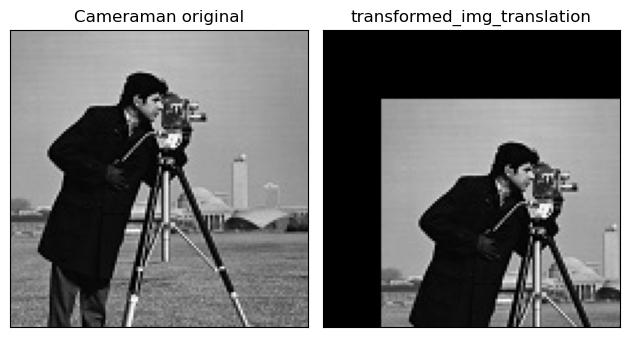

In [7]:
def transform_image(matrix, img):
    x_max, y_max = img.shape[1], img.shape[0]

    # Calculate the new size needed to fit the transformed image
    new_x_max = int(np.abs(x_max * matrix[0, 0]) + np.abs(y_max * matrix[0, 1]))
    new_y_max = int(np.abs(x_max * matrix[1, 0]) + np.abs(y_max * matrix[1, 1]))

    # Create an empty image for the transformed result
    new_img_map = np.zeros((new_y_max, new_x_max), dtype=np.uint8)

    # Find the center of the original and new image
    x_center = x_max // 2
    y_center = y_max // 2
    new_x_center = new_x_max // 2
    new_y_center = new_y_max // 2

    # Loop over each pixel in the original image
    for y_counter in range(0, y_max):
        for x_counter in range(0, x_max):
            # Define the current pixel with homogeneous coordinates
            curr_pixel = np.array([x_counter - x_center, y_counter - y_center, 1])
            # Apply the transformation matrix
            curr_pixel_transformed = np.dot(matrix, curr_pixel)

            # Translate back to the center of the new image
            new_x = int(curr_pixel_transformed[0] + new_x_center)
            new_y = int(curr_pixel_transformed[1] + new_y_center)

            # Check if the transformed pixel is within bounds
            if 0 <= new_x < new_x_max and 0 <= new_y < new_y_max:
                new_img_map[new_y, new_x] = img[y_counter, x_counter]

    return new_img_map

def translation_matrix(t1, t2):
    affine_matrix = np.array([
                                [1, 0, t1],
                                [0, 1, t2],
                                [0, 0, 1]
    ])
    return affine_matrix

# Input scaling factors
t1 = float(input("Enter horizontal translation factor: "))
t2 = float(input("Enter vertical translation factor : "))

affine_matrix = translation_matrix(t1, t2)
transformed_img_translation = transform_image(affine_matrix, img)

plt.figure()
plt.subplot(121)
plt.title("Cameraman original")
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.title("transformed_img_translation")
plt.imshow(transformed_img_translation, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

#Display the result using OpenCV
cv2.imshow("Transformed Image", transformed_img_translation)
cv2.waitKey(0)
cv2.destroyAllWindows()


### **SHEAR VERTICAL USING AFFINE MATRIX** 

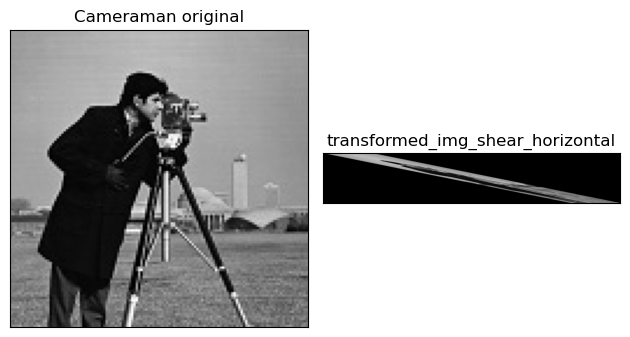

In [8]:
def transform_image(matrix, img):
    x_max, y_max = img.shape[1], img.shape[0]

    # Calculate the new size needed to fit the transformed image
    new_x_max = int(np.abs(x_max * matrix[0, 0]) + np.abs(y_max * matrix[0, 1]))
    new_y_max = int(np.abs(x_max * matrix[1, 0]) + np.abs(y_max * matrix[1, 1]))

    # Create an empty image for the transformed result
    new_img_map = np.zeros((new_y_max, new_x_max), dtype=np.uint8)

    # Find the center of the original and new image
    x_center = x_max // 2
    y_center = y_max // 2
    new_x_center = new_x_max // 2
    new_y_center = new_y_max // 2

    # Loop over each pixel in the original image
    for y_counter in range(0, y_max):
        for x_counter in range(0, x_max):
            # Define the current pixel with homogeneous coordinates
            curr_pixel = np.array([x_counter - x_center, y_counter - y_center, 1])
            # Apply the transformation matrix
            curr_pixel_transformed = np.dot(matrix, curr_pixel)

            # Translate back to the center of the new image
            new_x = int(curr_pixel_transformed[0] + new_x_center)
            new_y = int(curr_pixel_transformed[1] + new_y_center)

            # Check if the transformed pixel is within bounds
            if 0 <= new_x < new_x_max and 0 <= new_y < new_y_max:
                new_img_map[new_y, new_x] = img[y_counter, x_counter]

    return new_img_map

def s_vertical_matrix(s1):
    affine_matrix = np.array([
                                [1, s1, 0],
                                [0, 1,  0],
                                [0, 0,  1]
    ])
    return affine_matrix

# Input scaling factors
s1 = float(input("Enter vertical shear factor: "))


affine_matrix = s_vertical_matrix(s1)
transformed_img_shearh = transform_image(affine_matrix, resized_image)

plt.figure()
plt.subplot(121)
plt.title("Cameraman original")
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.title("transformed_img_shear_horizontal")
plt.imshow(transformed_img_shearh, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

# Display the result using OpenCV
cv2.imshow("Transformed Image", transformed_img_shearh)
cv2.waitKey(0)
cv2.destroyAllWindows()


### **SHEAR VERTICAL USING AFFINE MATRIX** 

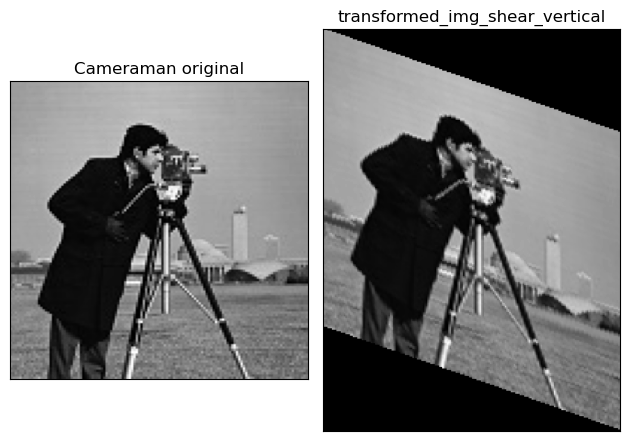

In [9]:
def transform_image(matrix, img):
    x_max, y_max = img.shape[1], img.shape[0]

    # Calculate the new size needed to fit the transformed image
    new_x_max = int(np.abs(x_max * matrix[0, 0]) + np.abs(y_max * matrix[0, 1]))
    new_y_max = int(np.abs(x_max * matrix[1, 0]) + np.abs(y_max * matrix[1, 1]))

    # Create an empty image for the transformed result
    new_img_map = np.zeros((new_y_max, new_x_max), dtype=np.uint8)

    # Find the center of the original and new image
    x_center = x_max // 2
    y_center = y_max // 2
    new_x_center = new_x_max // 2
    new_y_center = new_y_max // 2

    # Loop over each pixel in the original image
    for y_counter in range(0, y_max):
        for x_counter in range(0, x_max):
            # Define the current pixel with homogeneous coordinates
            curr_pixel = np.array([x_counter - x_center, y_counter - y_center, 1])
            # Apply the transformation matrix
            curr_pixel_transformed = np.dot(matrix, curr_pixel)

            # Translate back to the center of the new image
            new_x = int(curr_pixel_transformed[0] + new_x_center)
            new_y = int(curr_pixel_transformed[1] + new_y_center)

            # Check if the transformed pixel is within bounds
            if 0 <= new_x < new_x_max and 0 <= new_y < new_y_max:
                new_img_map[new_y, new_x] = img[y_counter, x_counter]

    return new_img_map

def s_horizontal_matrix(s2):
    affine_matrix = np.array([
                                [1, 0, 0],
                                [s2, 1,0],
                                [0, 0,  1]
    ])
    return affine_matrix

# Input scaling factors
s2 = float(input("Enter horizontal shear factor: "))


affine_matrix = s_horizontal_matrix(s2)
transformed_img_shearv = transform_image(affine_matrix, resized_image)

plt.figure()
plt.subplot(121)
plt.title("Cameraman original")
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.title("transformed_img_shear_vertical")
plt.imshow(transformed_img_shearv, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

# Display the result using OpenCV
cv2.imshow("Transformed Image", transformed_img_shearv)
cv2.waitKey(0)
cv2.destroyAllWindows()


### **TRANSFORMING IMAGE USING INBULIT CV2 METHODS**

In [10]:
resized_image_inbuilt = cv2.resize(img, (200,200), interpolation = cv2.INTER_LINEAR)

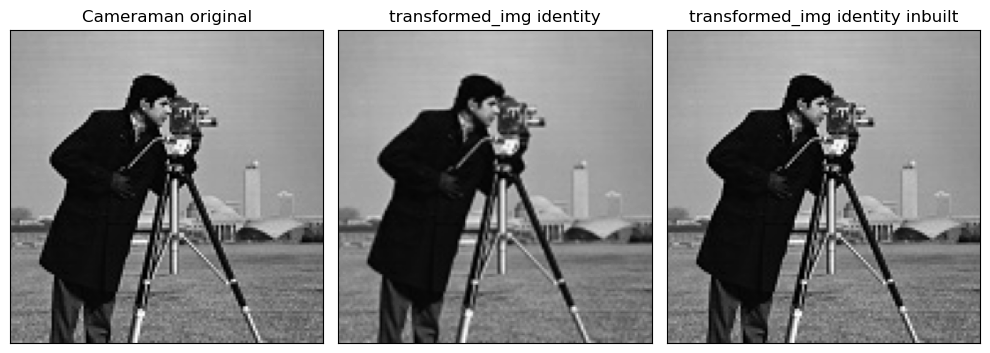

In [11]:
height,width = img.shape
identity_affine_vertical = np.float32([
                                [1, 0, 0],
                                [0, 1, 0]
                                
                                
    ])
img_translation_identity = cv2.warpAffine(img, identity_affine_vertical, (width, height))
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.title("Cameraman original")
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.title("transformed_img identity")
plt.imshow(transformed_img_identity, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.title("transformed_img identity inbuilt")
plt.imshow(img_translation_identity, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

# cv2.imshow("Originalimage", img) 
# cv2.imshow('Translation', img_translation_identity)
# cv2.waitKey() 

# cv2.destroyAllWindows() 

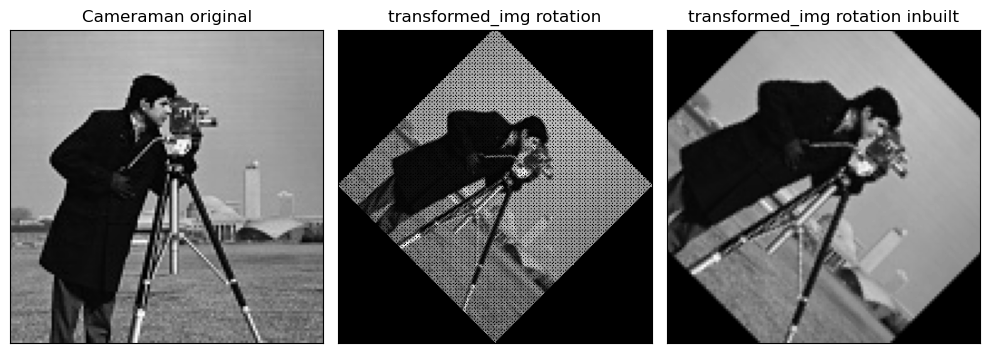

In [12]:
# Input scaling factors
height,width = img.shape
M=cv2.getRotationMatrix2D(center=(height/2,width/2),angle=-45,scale=1)
img_translation_rotation= cv2.warpAffine(img, M, (width, height))


plt.figure(figsize=(10,5))
plt.subplot(131)
plt.title("Cameraman original")
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.title("transformed_img rotation")
plt.imshow(transformed_img_rotation, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.title("transformed_img rotation inbuilt")
plt.imshow(img_translation_rotation, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()
# cv2.imshow("Originalimage", img) 
# cv2.imshow('Translation', img_translation)
# cv2.waitKey() 

# cv2.destroyAllWindows() 

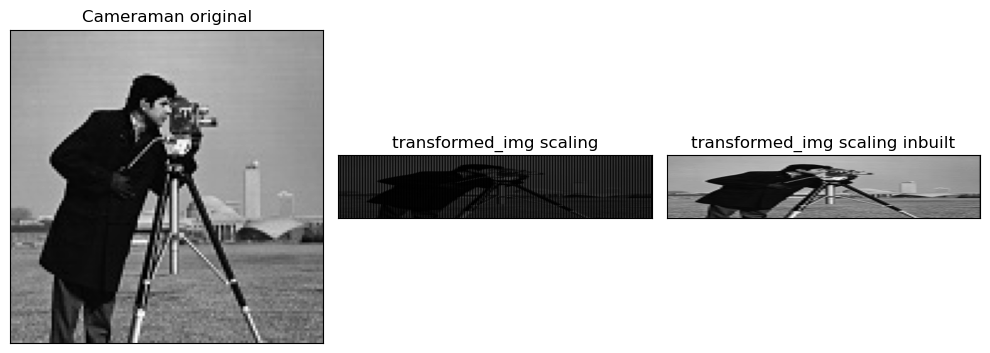

In [13]:
# Input scaling factors
c1 = float(input("Enter horizontal scaling factor: "))
c2 = float(input("Enter vertical scaling factor : "))
height,width = img.shape
# Calculating new width and height after scaling
new_width = int(width * c1)
new_height = int(height * c2)
scaling_affine_matrix = np.float32([
                                [c1, 0, 0],
                                [0, c2, 0]
                                
                                
    ])
img_translation_scaling = cv2.warpAffine(img, scaling_affine_matrix, (new_width, new_height))

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.title("Cameraman original")
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.title("transformed_img scaling")
plt.imshow(transformed_img_scaling, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.title("transformed_img scaling inbuilt")
plt.imshow(img_translation_scaling, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

cv2.imshow("Originalimage", img) 
cv2.imshow('Translation', img_translation_scaling)
cv2.waitKey() 

cv2.destroyAllWindows() 

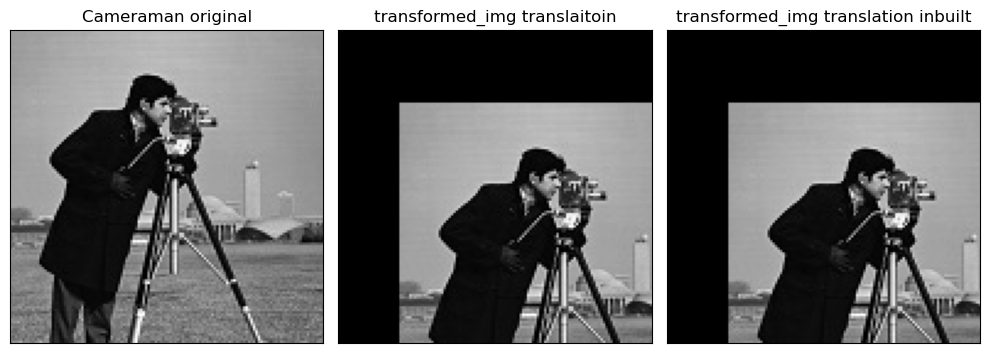

In [14]:
# Input scaling factors
t1 = float(input("Enter horizontal translation factor: "))
t2 = float(input("Enter vertical translation factor : "))
height,width = img.shape
translating_affine_vertical = np.float32([
                                [1, 0,t1],
                                [0, 1, t2]
                                
                                
    ])
img_translation_translation = cv2.warpAffine(img, translating_affine_vertical, (width, height))

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.title("Cameraman original")
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.title("transformed_img translaitoin")
plt.imshow(transformed_img_translation, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.title("transformed_img translation inbuilt")
plt.imshow(img_translation_translation, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

# cv2.imshow("Originalimage", img) 
# cv2.imshow('Translation', img_translation)
# cv2.waitKey() 

# cv2.destroyAllWindows() 

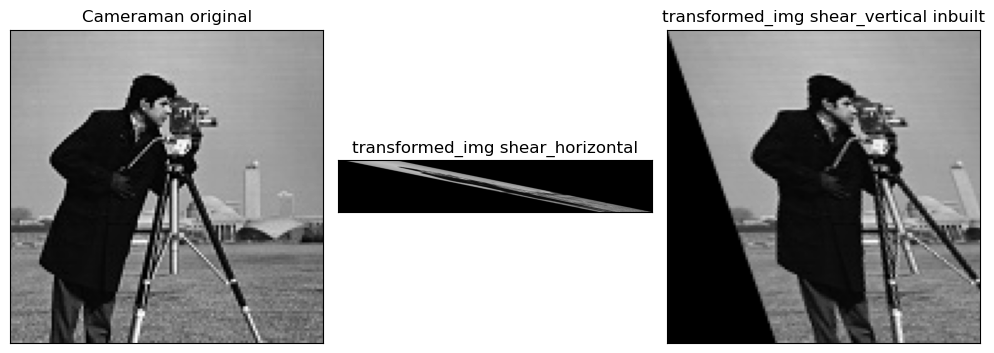

In [15]:
s1 = float(input("Give the horizontal shearing factor:"))
height,width = img.shape
shearing_affine_vertical = np.float32([
                                [1, s1,0],
                                [0, 1, 0]
                                
                                
    ])
img_translation_shearh = cv2.warpAffine(img, shearing_affine_vertical, (width, height))


plt.figure(figsize=(10,5))
plt.subplot(131)
plt.title("Cameraman original")
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.title("transformed_img shear_horizontal")
plt.imshow(transformed_img_shearh, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.title("transformed_img shear_vertical inbuilt")
plt.imshow(img_translation_shearh, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

# cv2.imshow("Originalimage", img) 
# cv2.imshow('Translation', img_translation)
# cv2.waitKey() 

# cv2.destroyAllWindows() 

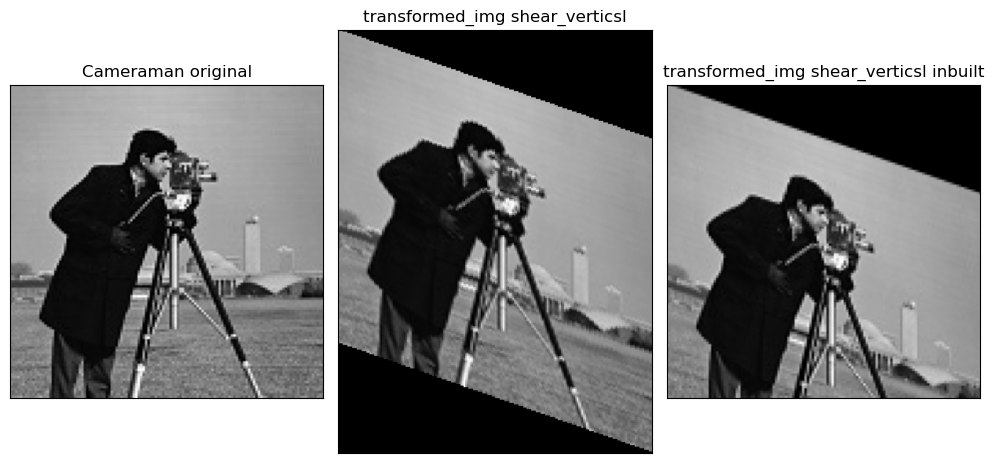

In [16]:
s2 = float(input("Give the vertical shearing factor:"))
height,width = img.shape
shearing_affine_vertical = np.float32([
                                [1, 0, 0],
                                [s2, 1, 0]
                                
                                
    ])
img_translation_shearv = cv2.warpAffine(img, shearing_affine_vertical, (width, height))

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.title("Cameraman original")
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.title("transformed_img shear_verticsl")
plt.imshow(transformed_img_shearv, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.title("transformed_img shear_verticsl inbuilt")
plt.imshow(img_translation_shearv, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

# cv2.imshow("Originalimage", img) 
# cv2.imshow('Translation', img_translation_shearv)
# cv2.waitKey() 

# cv2.destroyAllWindows() 